<a href="https://colab.research.google.com/github/blowmeaway1234/Artificial-Intelligence/blob/main/AI_WEEK_9_HOMEWORK_cifa100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cifa 100

In [86]:
from keras.datasets import cifar100
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np


(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


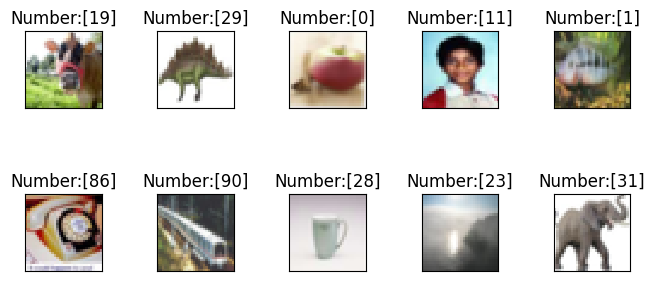

In [87]:
# Device Data for test and train
(x_train,y_train),(x_test,y_test)=cifar100.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
for i in range(10):
  plt.subplot(3,5,i+1)
  plt.tight_layout()
  plt.imshow((x_train[i]),cmap='gray',
             interpolation='None')
  plt.title('Number:{}'.format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

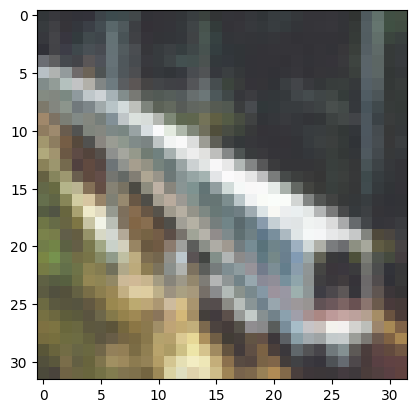

Number: [90]


In [88]:
# Check Data
digit = x_train[6]
plt.imshow(digit,cmap=plt.cm.binary)
plt.show()
print('Number:',y_train[6])

In [89]:
# Xây dựng mô hình mạng ANN
model = Sequential ()
model.add(Dense (10000,activation='relu',input_shape =(32*32*3,)))
model.add(Dense (5024,activation='relu'))
model.add(Dense (1024,activation='relu'))
model.add(Dense (512,activation='relu'))
model.add(Dense (100 ,activation='softmax'))
model.summary()


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_46 (Dense)            (None, 10000)             30730000  
                                                                 
 dense_47 (Dense)            (None, 5024)              50245024  
                                                                 
 dense_48 (Dense)            (None, 1024)              5145600   
                                                                 
 dense_49 (Dense)            (None, 512)               524800    
                                                                 
 dense_50 (Dense)            (None, 100)               51300     
                                                                 
Total params: 86,696,724
Trainable params: 86,696,724
Non-trainable params: 0
_________________________________________________________________


In [90]:
# Preprocessing Data
x_train=x_train.reshape(50000,32*32*3)
x_train=x_train.astype('float32')/255 # Chuyen doi du lieu tu 0-255 thanh 0-1 voi kieu float
x_test=x_test.reshape(10000,32*32*3)
x_test=x_test.astype('float32')/255
x= x_test
y= y_test

In [91]:
y_train=to_categorical(y_train,100)
y_test=to_categorical(y_test,100)
print('x_train : ',x_train.shape)
print('y_train :',y_train.shape)
print('x_test : ',x_test.shape)
print('y_test : ',y_test.shape)

x_train :  (50000, 3072)
y_train : (50000, 100)
x_test :  (10000, 3072)
y_test :  (10000, 100)


In [92]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=100,batch_size=1024)
test_loss,test_acc=model.evaluate(x_test,y_test)
print('Loss : ',test_loss)
print('Accuracy : ', test_acc)

Epoch 1/100
49/49 [==============================] - 8s 131ms/step - loss: 5.7277 - accuracy: 0.0156
Epoch 2/100
49/49 [==============================] - 6s 131ms/step - loss: 4.5232 - accuracy: 0.0250
Epoch 3/100
49/49 [==============================] - 7s 136ms/step - loss: 4.2947 - accuracy: 0.0405
Epoch 4/100
49/49 [==============================] - 7s 138ms/step - loss: 4.1877 - accuracy: 0.0527
Epoch 5/100
49/49 [==============================] - 7s 139ms/step - loss: 4.1152 - accuracy: 0.0616
Epoch 6/100
49/49 [==============================] - 7s 135ms/step - loss: 4.0552 - accuracy: 0.0697
Epoch 7/100
49/49 [==============================] - 7s 134ms/step - loss: 4.0222 - accuracy: 0.0768
Epoch 8/100
49/49 [==============================] - 6s 130ms/step - loss: 3.9670 - accuracy: 0.0848
Epoch 9/100
49/49 [==============================] - 6s 129ms/step - loss: 3.9266 - accuracy: 0.0936
Epoch 10/100
49/49 [==============================] - 6s 128ms/step - loss: 3.8695 - accura

In [93]:
 model.save('Cifa100.h5')

1/1 [==============================] - 0s 64ms/step


array([8])

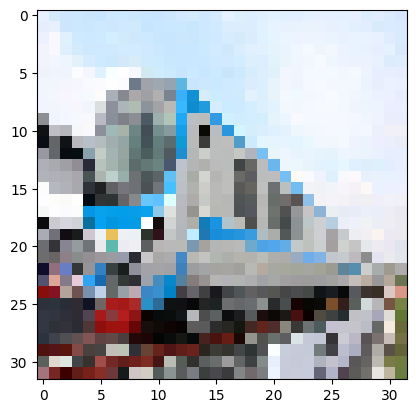

In [94]:
img='train.jpg'
import numpy as np
from keras.utils import load_img,img_to_array
import matplotlib.pyplot as plt
img=load_img(img,target_size=(32,32))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,32*32*3)
img=img.astype('float32')
img=img/255
np.argmax(model.predict(img),axis=-1)

In [96]:
import matplotlib.pyplot as plt
digit = x[8]
plt.show()
print('Number:',y[8])

Number: [23]
